In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%ls gdrive/MyDrive/'Colab Notebooks'

BTC@  GOLD@  TK.ipynb


In [6]:
import pandas as pd
import numpy as np
import os
import datetime

In [4]:
folder_path =  'gdrive/MyDrive/Colab Notebooks/'

def extract_date(filename):
    date_str = filename.split('_')[2].split('-')[0]
    return datetime.datetime.strptime(date_str, "%d.%m.%Y")

btc_dir = folder_path + 'BTC'
btc_files = sorted(os.listdir(btc_dir))
btc_files = sorted(btc_files, key=extract_date)
print(btc_files)

['BTCUSD_Ticks_11.12.2023-11.12.2023.csv', 'BTCUSD_Ticks_12.12.2023-12.12.2023.csv', 'BTCUSD_Ticks_13.12.2023-13.12.2023.csv', 'BTCUSD_Ticks_14.12.2023-14.12.2023.csv', 'BTCUSD_Ticks_15.12.2023-15.12.2023.csv', 'BTCUSD_Ticks_16.12.2023-16.12.2023.csv', 'BTCUSD_Ticks_17.12.2023-17.12.2023.csv', 'BTCUSD_Ticks_18.12.2023-18.12.2023.csv', 'BTCUSD_Ticks_19.12.2023-19.12.2023.csv', 'BTCUSD_Ticks_20.12.2023-20.12.2023.csv', 'BTCUSD_Ticks_21.12.2023-21.12.2023.csv', 'BTCUSD_Ticks_22.12.2023-22.12.2023.csv', 'BTCUSD_Ticks_23.12.2023-23.12.2023.csv', 'BTCUSD_Ticks_24.12.2023-24.12.2023.csv', 'BTCUSD_Ticks_25.12.2023-25.12.2023.csv', 'BTCUSD_Ticks_26.12.2023-26.12.2023.csv', 'BTCUSD_Ticks_27.12.2023-27.12.2023.csv', 'BTCUSD_Ticks_28.12.2023-28.12.2023.csv', 'BTCUSD_Ticks_29.12.2023-29.12.2023.csv', 'BTCUSD_Ticks_30.12.2023-30.12.2023.csv', 'BTCUSD_Ticks_31.12.2023-31.12.2023.csv', 'BTCUSD_Ticks_01.01.2024-01.01.2024.csv', 'BTCUSD_Ticks_02.01.2024-02.01.2024.csv', 'BTCUSD_Ticks_03.01.2024-03.01.20

In [44]:
df = pd.read_csv(btc_dir+'/'+btc_files[0])
df

,Gmt time,Ask,Bid,AskVolume,BidVolume
0,11.12.2023 00:00:00.372,43825.4,43751.4,0.2,0.2
1,11.12.2023 00:00:00.623,43826.6,43751.4,0.2,0.2
2,11.12.2023 00:00:00.874,43826.6,43751.4,0.2,0.2
3,11.12.2023 00:00:01.426,43826.6,43750.6,0.2,0.2
4,11.12.2023 00:00:02.378,43826.6,43750.6,0.2,0.2
...,...,...,...,...,...
160197,11.12.2023 23:59:57.761,41278.8,41203.5,4.0,4.0
160198,11.12.2023 23:59:57.962,41274.8,41203.5,0.2,4.0
160199,11.12.2023 23:59:59.770,41274.8,41200.0,0.2,8.0
160200,11.12.2023 23:59:59.821,41274.8,41200.0,0.2,8.0


In [45]:
def logreturns(df: pd.DataFrame, column_name='close', result_name='log_returns'):
    df[result_name] = np.log(df[column_name] / df[column_name].shift(1))
    # df.dropna(inplace=True, axis=0)
    return df

In [46]:
df = logreturns(df, 'Ask', 'log_return_ask')
df

,Gmt time,Ask,Bid,AskVolume,BidVolume,log_return_ask
0,11.12.2023 00:00:00.372,43825.4,43751.4,0.2,0.2,NaN
1,11.12.2023 00:00:00.623,43826.6,43751.4,0.2,0.2,0.000027
2,11.12.2023 00:00:00.874,43826.6,43751.4,0.2,0.2,0.000000
3,11.12.2023 00:00:01.426,43826.6,43750.6,0.2,0.2,0.000000
4,11.12.2023 00:00:02.378,43826.6,43750.6,0.2,0.2,0.000000
...,...,...,...,...,...,...
160197,11.12.2023 23:59:57.761,41278.8,41203.5,4.0,4.0,-0.000034
160198,11.12.2023 23:59:57.962,41274.8,41203.5,0.2,4.0,-0.000097
160199,11.12.2023 23:59:59.770,41274.8,41200.0,0.2,8.0,0.000000
160200,11.12.2023 23:59:59.821,41274.8,41200.0,0.2,8.0,0.000000


In [47]:
# I'll pretend big movers are found - they're simply all the `t` tick intervals, the 'big jumps' being the change in price over the next 5 ticks.
# would ideally encode big movers by their indices, and the jump - so [2, 10, 0.03] (ticks 2 to 10 followed by a jump of 0.03 which is over some threshold we set)
t = 100
df = logreturns(df, 'Bid', 'log_return_bid')
df

,Gmt time,Ask,Bid,AskVolume,BidVolume,log_return_ask,log_return_bid
0,11.12.2023 00:00:00.372,43825.4,43751.4,0.2,0.2,NaN,NaN
1,11.12.2023 00:00:00.623,43826.6,43751.4,0.2,0.2,0.000027,0.000000
2,11.12.2023 00:00:00.874,43826.6,43751.4,0.2,0.2,0.000000,0.000000
3,11.12.2023 00:00:01.426,43826.6,43750.6,0.2,0.2,0.000000,-0.000018
4,11.12.2023 00:00:02.378,43826.6,43750.6,0.2,0.2,0.000000,0.000000
...,...,...,...,...,...,...,...
160197,11.12.2023 23:59:57.761,41278.8,41203.5,4.0,4.0,-0.000034,0.000000
160198,11.12.2023 23:59:57.962,41274.8,41203.5,0.2,4.0,-0.000097,0.000000
160199,11.12.2023 23:59:59.770,41274.8,41200.0,0.2,8.0,0.000000,-0.000085
160200,11.12.2023 23:59:59.821,41274.8,41200.0,0.2,8.0,0.000000,0.000000


In [48]:
df.describe()

,Ask,Bid,AskVolume,BidVolume,log_return_ask,log_return_bid
count,160202.000000,160202.000000,160202.000000,160202.000000,1.602010e+05,1.602010e+05
mean,41744.128792,41672.772566,1.453535,4.505279,-3.746667e-07,-3.750623e-07
std,668.522926,667.833397,2.779604,3.100173,9.827264e-05,1.382036e-04
min,40230.900000,40147.200000,0.100000,0.050000,-5.562314e-03,-9.585298e-03
25%,41213.900000,41142.500000,0.200000,0.200000,0.000000e+00,0.000000e+00
50%,41895.200000,41825.700000,0.200000,5.000000,0.000000e+00,0.000000e+00
75%,42181.600000,42109.100000,0.200000,8.000000,0.000000e+00,0.000000e+00
max,43842.100000,43771.000000,15.000000,11.000000,7.459811e-03,1.137586e-02


In [59]:
threshold = 0.001
big_movers = df.loc[((abs(df['log_return_ask']) > threshold) | (abs(df['log_return_bid']) > threshold))].index

In [60]:
big_movers
# use the t ticks before elements in big_movers as run up.


Index([  2096,   3088,   6569,   6574,   6576,   6578,   6638,   6696,   7675,
         7909,
       ...
       138356, 139229, 139473, 139493, 139679, 139684, 139816, 139982, 140623,
       141916],
      dtype='int64', length=255)

In [80]:
bmx = np.array([df.loc[x-t:x-1, 'log_return_ask'] for x in big_movers])

In [96]:
len(bmx[0])

100

In [81]:
y = np.array(df.loc[big_movers, 'log_return_ask'])

In [66]:
!pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 6.3 MB/s eta 0:00:00


In [82]:
from tslearn.neighbors import KNeighborsTimeSeries
KNN = KNeighborsTimeSeries(n_neighbors=5).fit(bmx)

In [83]:
from tslearn.neighbors import KNeighborsTimeSeriesRegressor
clf = KNeighborsTimeSeriesRegressor(n_neighbors=5).fit(bmx, y)

In [89]:
# clf.kneighbors(np.array(df.loc[:t-1, 'log_return_ask']))
clf.kneighbors(bmx)

(array([[-5.19688383e-04, -5.10227545e-04, -4.02703874e-04,
         -3.03255171e-04, -2.59945505e-04],
        [-5.21608690e-04, -4.70599100e-04, -2.41966985e-04,
         -1.88945752e-04, -1.63617656e-04],
        [-4.68364984e-04, -4.39755280e-04, -3.71550391e-04,
         -3.32882122e-04, -3.21155044e-04],
        ...,
        [-9.77311709e-05, -9.77139815e-05, -9.76932189e-05,
         -9.76645954e-05, -9.76638801e-05],
        [-2.87773997e-04, -1.12032265e-04, -9.75916814e-05,
         -9.75904909e-05, -9.75904909e-05],
        [-1.16498068e-04, -9.94953644e-05, -9.69786308e-05,
         -9.21896001e-05, -5.33834167e-05]]),
 array([[94, 92, 99, 90, 97],
        [99, 97, 59,  1, 33],
        [96, 75, 19, 88, 79],
        ...,
        [11,  3, 29, 44, 50],
        [78, 99, 42, 33, 25],
        [ 4, 19, 94, 53, 15]]))

In [85]:
df.loc[t, :]

,100
Gmt time,11.12.2023 00:01:51.349
Ask,43803.0
Bid,43726.8
AskVolume,0.2
BidVolume,0.2
log_return_ask,0.0
log_return_bid,0.0


In [90]:
test_data_df = pd.read_csv(btc_dir+'/'+btc_files[1])
test_data_df

,Gmt time,Ask,Bid,AskVolume,BidVolume
0,12.12.2023 00:00:00.373,41272.3,41200.0,0.2,8.0
1,12.12.2023 00:00:00.875,41272.3,41200.0,0.2,8.0
2,12.12.2023 00:00:02.380,41272.3,41196.5,0.2,8.0
3,12.12.2023 00:00:02.581,41269.2,41196.5,0.2,8.0
4,12.12.2023 00:00:02.882,41269.2,41196.5,0.2,8.0
...,...,...,...,...,...
160578,12.12.2023 23:59:33.225,41512.4,41447.6,0.2,4.0
160579,12.12.2023 23:59:33.276,41516.8,41447.6,3.0,4.0
160580,12.12.2023 23:59:34.379,41516.5,41447.6,3.0,4.0
160581,12.12.2023 23:59:34.631,41513.5,41447.6,0.2,4.0


In [91]:
test_x = logreturns(test_data_df, 'Ask', 'log_return_ask')['log_return_ask']
test_x

,log_return_ask
0,NaN
1,0.000000
2,0.000000
3,-0.000075
4,0.000000
...,...
160578,0.000000
160579,0.000106
160580,-0.000007
160581,-0.000072


In [116]:
print(len(test_x) - (len(test_x) % t), len(test_x) // t)

160500 1605


In [119]:
x = np.vstack(np.split(np.array(test_x)[1: len(test_x) - (len(test_x) % t) + 1], len(test_x) // t))

In [ ]:
x[:10]

In [108]:
print(len(x), len(x[0]), len(x[1]), len(x[-2]), len(x[-1]))

1605 100 100 100 100


In [121]:
x.dtype

dtype('float64')

In [123]:
clf.kneighbors(x[:10], return_distance=True)

(array([[0.00053411, 0.00053411, 0.00053411, 0.00053411, 0.00053411],
        [0.00032526, 0.00032526, 0.00032526, 0.00032526, 0.00032526],
        [0.00033386, 0.00033386, 0.00033386, 0.00033386, 0.00033386],
        [0.00047164, 0.00047164, 0.00047164, 0.00047164, 0.00047164],
        [0.00046263, 0.00046263, 0.00046263, 0.00046263, 0.00046263],
        [0.0003108 , 0.0003108 , 0.0003108 , 0.0003108 , 0.0003108 ],
        [0.00063423, 0.00063423, 0.00063423, 0.00063423, 0.00063423],
        [0.00037608, 0.00037608, 0.00037608, 0.00037608, 0.00037608],
        [0.0004105 , 0.0004105 , 0.0004105 , 0.0004105 , 0.0004105 ],
        [0.00036749, 0.00036749, 0.00036749, 0.00036749, 0.00036749]]),
 array([[171, 172, 170, 168, 173],
        [171, 172, 170, 168, 173],
        [171, 172, 170, 168, 173],
        [171, 172, 170, 168, 173],
        [171, 172, 170, 168, 173],
        [171, 172, 170, 168, 173],
        [171, 172, 170, 168, 173],
        [171, 172, 170, 168, 173],
        [171, 172,

In [124]:
distances, neighbors = clf.kneighbors(x, return_distance=True)

In [127]:
pd.DataFrame(distances).describe()

,0,1,2,3,4
count,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000
mean,0.000471,0.000471,0.000471,0.000471,0.000471
std,0.000197,0.000197,0.000197,0.000197,0.000197
min,0.000090,0.000090,0.000090,0.000090,0.000090
25%,0.000335,0.000335,0.000335,0.000335,0.000335
50%,0.000434,0.000434,0.000434,0.000434,0.000434
75%,0.000569,0.000569,0.000569,0.000569,0.000569
max,0.002026,0.002026,0.002026,0.002026,0.002026


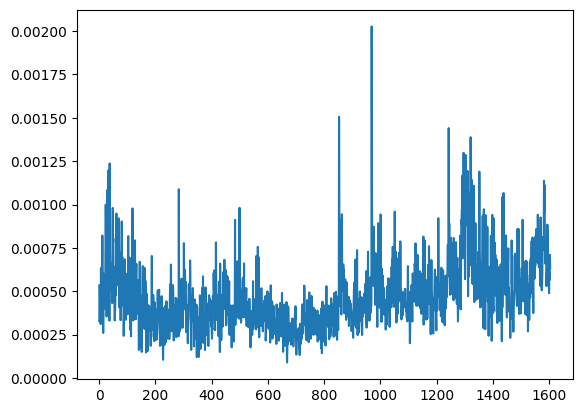

In [129]:
import matplotlib.pyplot as plt
plt.plot(distances.T[0])
# plt.plot
plt.show()

In [135]:
actual = test_x.iloc[1::100]
actual[:-1]

,log_return_ask
1,0.000000
101,0.000000
201,-0.000010
301,0.000000
401,0.000000
...,...
160001,-0.000072
160101,0.000108
160201,0.000000
160301,0.000000


In [ ]:
predicted = [y[neighbors[x][0]] for x in range(len(neighbors))]
predicted

In [137]:
pd.Series(predicted).value_counts()

,count
0.001065,1605


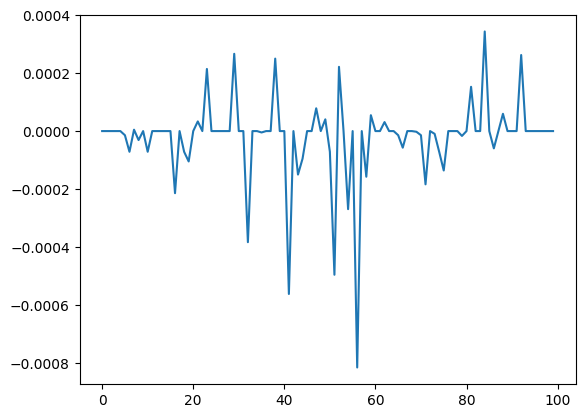

In [138]:
plt.plot(bmx[171])
plt.show()

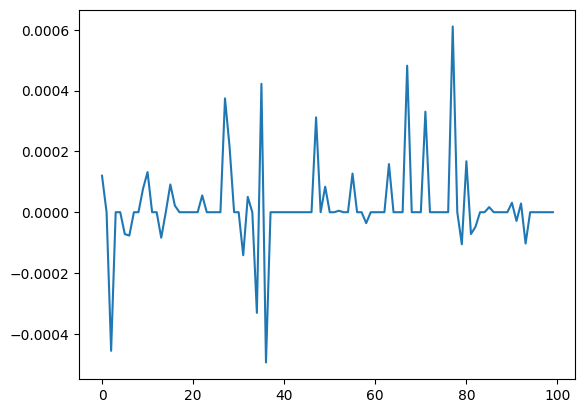

In [139]:
plt.plot(bmx[168])